# <font color=#BB44>Python Introduction (MSTC)</font>

## [NumPy is the fundamental package for scientific computing with Python](http://www.numpy.org/)
![Imagen Numpy](http://www.numpy.org/_static/numpy_logo.png)

## [Matplotlib is a Python 2D plotting library](https://matplotlib.org/)
![Matplotlib Image](https://matplotlib.org/_static/logo2.png)

## [Python Data Analysis Library](https://pandas.pydata.org/)
![Pandas Image](https://pandas.pydata.org/_static/pandas_logo.png)

## [scikit-learn: Machine Learning in Python](http://scikit-learn.org/stable/)
![Scikit-learn Image](http://scikit-learn.org/stable/_static/scikit-learn-logo-small.png)


---

## Read the OSA data (without empty patients and chars in "peso")

In [1]:
# Import pandas
import pandas as pd

# Assign spreadsheet filename to `file`
file = 'Info_BDApnea_QuironMalaga_rev1.xlsx'

# Load spreadsheet
xl = pd.ExcelFile(file)

# Print the sheet names
print(xl.sheet_names)


['Hoja1', 'Hoja2']


In [2]:

# Load a sheet into a DataFrame by name: df1
df_tmp = xl.parse('Hoja1')

In [3]:
df_tmp

,Patient,Comentarios,Audios tumbado,Fotos,Audio fs KHz,Gender,EPWORTH,IAH,IAH Supino,IAH Lateral,...,Sala/Ruidos,Imagen,Dialecto,DIST EXT OJOS,DIST BARB-LOB,Cansancio,Concentrarse,PerdRespNoche,HiperT,EstHOSP
0,P0001,es el Patient0002 (fotos) 3 (sentado) y 4 (tum...,si,si,16,hombre,NaN,71.0,-1,-1,...,nd,nd,nd,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,P0002,Es el Patient0006 (sentado) y 7 (tumbado),si,si,16,hombre,NaN,29.6,-1,-1,...,nd,nd,nd,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,P0003,"Patient 8, 9 y 10",si,si,16,hombre,NaN,56.0,-1,-1,...,nd,nd,nd,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,P0004,Patient 13 y 14,si_codigos,si,16,hombre,NaN,19.7,-1,-1,...,nd,nd,nd,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,P0005,Patient0015 los códigos QMH5,si_codigos,si,16,hombre,NaN,9.0,-1,-1,...,nd,nd,nd,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678,P0679,QMH688(patient0753) usa CPAP,NO_UNAREP,si,55/16,hombre,NaN,9.2,15.9,7.3,...,443,nd,andaluz/Málaga,10.860,15.019,no,no,1,1.0,1.0
679,P0680,QMH689(patient0754),NO_UNAREP,si,55/16,hombre,NaN,52.2,53.4,50.3,...,442,nd,Mezcla,10.268,14.383,si,no,1,0.0,0.0
680,P0681,QMH690(patient0755) usa CPAP,NO_UNAREP,si,55/16,hombre,NaN,NaN,NO disponible,NaN,...,434,nd,andaluz/Málaga,9.181,14.35,no,no,1,1.0,0.0
681,P0682,QMH691(patient0756),NO_UNAREP,si,55/16,mujer,NaN,5.4,NaN,este sobre todo,...,436,nd,andaluz/Málaga,8.543,11.956,si,si,1,0.0,1.0


In [4]:
columns = ['Patient', 'Gender', 'IAH', 'Peso', 'Talla', 'Edad', 'PerCervical','Enfermedades']
df_tmp1 = pd.DataFrame(df_tmp, columns=columns)


In [5]:
df_tmp1.head(100)

,Patient,Gender,IAH,Peso,Talla,Edad,PerCervical,Enfermedades
0,P0001,hombre,71.0,82.0,168.0,39.0,-1.0,Septo_Nasal_Desviado
1,P0002,hombre,29.6,119.0,174.0,56.0,48.0,nd
2,P0003,hombre,56.0,-1.0,-1.0,46.0,43.0,nd
3,P0004,hombre,19.7,78.0,168.0,39.0,42.0,Hiperactividad_bronquial
4,P0005,hombre,9.0,80.0,173.0,32.0,40.0,Septo_Nasal_Desviado_Operado
...,...,...,...,...,...,...,...,...
95,P0096,hombre,5.0,70.0,169.0,34.0,41.0,Septo_Nasal_Desviado\nSinusitis
96,P0097,hombre,2.2,101.0,163.0,65.0,46.0,no
97,P0098,mujer,6.3,52.0,158.0,34.0,33.0,Cornetes
98,P0099,mujer,9.5,70.0,160.0,47.0,36.0,Septo_Nasal_Desviado


## Look for and remove NA rows  (remember that -1 ar also NAN)

In [6]:
df_tmp1.isnull().sum()


Patient          0
Gender           0
IAH             34
Peso             7
Talla            6
Edad             5
PerCervical      5
Enfermedades     5
dtype: int64

In [7]:
df_tmp1[df_tmp1['IAH'].isnull()]

,Patient,Gender,IAH,Peso,Talla,Edad,PerCervical,Enfermedades
260,P0261,hombre,NaN,NaN,NaN,NaN,NaN,NaN
299,P0300,hombre,NaN,NaN,NaN,NaN,NaN,NaN
314,P0315,mujer,NaN,NaN,NaN,NaN,NaN,NaN
331,P0332,hombre,NaN,100.0,178.0,52.0,42.0,"Bronquitis cronica, tabique desviado"
429,P0430,hombre,NaN,131.0,175.0,49.0,45.0,Propenso afonía
441,P0442,mujer,NaN,90.0,163.0,32.0,35.0,Asma
444,P0445,hombre,NaN,120.0,165.0,48.0,46.0,no
461,P0462,hombre,NaN,80.0,170.0,61.0,39.0,Tabique algo desviado
469,P0470,hombre,NaN,78.0,189.0,31.0,36.0,no
490,P0491,mujer,NaN,108.0,162.0,44.0,37.0,no


In [8]:
df_tmp1[df_tmp1['Peso']==-1]

,Patient,Gender,IAH,Peso,Talla,Edad,PerCervical,Enfermedades
2,P0003,hombre,56.0,-1.0,-1.0,46.0,43.0,nd


## Replace -1 for numpy NAN)

In [9]:
import numpy as np

In [10]:
df_tmp1 = df_tmp1.replace(-1, np.nan)

In [11]:
df_tmp1.head(15)

,Patient,Gender,IAH,Peso,Talla,Edad,PerCervical,Enfermedades
0,P0001,hombre,71.0,82.0,168.0,39.0,NaN,Septo_Nasal_Desviado
1,P0002,hombre,29.6,119.0,174.0,56.0,48.0,nd
2,P0003,hombre,56.0,NaN,NaN,46.0,43.0,nd
3,P0004,hombre,19.7,78.0,168.0,39.0,42.0,Hiperactividad_bronquial
4,P0005,hombre,9.0,80.0,173.0,32.0,40.0,Septo_Nasal_Desviado_Operado
5,P0006,hombre,2.0,109.0,190.0,32.0,42.0,Hipertrofia_cornetes_nasales
6,P0007,hombre,34.0,86.0,169.0,39.0,42.0,Cornetes
7,P0008,hombre,60.0,145.0,172.0,47.0,44.0,Rinitis
8,P0009,hombre,22.0,72.0,165.0,40.0,42.0,Rinitis crónica
9,P0010,hombre,11.0,80.0,180.0,28.0,38.0,no


### .... now drop out all rows with NAN

In [12]:
df_final = df_tmp1.dropna()

In [13]:
df_final.head(10)

,Patient,Gender,IAH,Peso,Talla,Edad,PerCervical,Enfermedades
1,P0002,hombre,29.6,119.0,174.0,56.0,48.0,nd
3,P0004,hombre,19.7,78.0,168.0,39.0,42.0,Hiperactividad_bronquial
4,P0005,hombre,9.0,80.0,173.0,32.0,40.0,Septo_Nasal_Desviado_Operado
5,P0006,hombre,2.0,109.0,190.0,32.0,42.0,Hipertrofia_cornetes_nasales
6,P0007,hombre,34.0,86.0,169.0,39.0,42.0,Cornetes
7,P0008,hombre,60.0,145.0,172.0,47.0,44.0,Rinitis
8,P0009,hombre,22.0,72.0,165.0,40.0,42.0,Rinitis crónica
9,P0010,hombre,11.0,80.0,180.0,28.0,38.0,no
12,P0013,hombre,3.7,90.0,180.0,36.0,40.0,ns
13,P0014,mujer,7.0,50.0,158.0,50.0,35.0,Sinusitis


In [14]:
df_final = df_final.rename(columns = {"Talla": "Height", 
                                "Peso":"Weight", 
                                "Edad": "Age",
                                "PerCervical": "Cervical",
                                "Enfermedades": "Diseases"})

In [15]:
df_final.head(10)

,Patient,Gender,IAH,Weight,Height,Age,Cervical,Diseases
1,P0002,hombre,29.6,119.0,174.0,56.0,48.0,nd
3,P0004,hombre,19.7,78.0,168.0,39.0,42.0,Hiperactividad_bronquial
4,P0005,hombre,9.0,80.0,173.0,32.0,40.0,Septo_Nasal_Desviado_Operado
5,P0006,hombre,2.0,109.0,190.0,32.0,42.0,Hipertrofia_cornetes_nasales
6,P0007,hombre,34.0,86.0,169.0,39.0,42.0,Cornetes
7,P0008,hombre,60.0,145.0,172.0,47.0,44.0,Rinitis
8,P0009,hombre,22.0,72.0,165.0,40.0,42.0,Rinitis crónica
9,P0010,hombre,11.0,80.0,180.0,28.0,38.0,no
12,P0013,hombre,3.7,90.0,180.0,36.0,40.0,ns
13,P0014,mujer,7.0,50.0,158.0,50.0,35.0,Sinusitis


In [16]:
df_final.describe()

,IAH,Weight,Height,Age,Cervical
count,635.000000,635.000000,635.000000,635.000000,635.000000
mean,20.354898,87.737008,171.278740,49.492913,40.637008
std,18.612508,18.379331,9.570069,12.387329,3.962876
min,0.000000,45.000000,144.000000,20.000000,30.000000
25%,6.350000,75.000000,165.000000,40.000000,38.000000
50%,14.300000,86.000000,171.000000,49.000000,41.000000
75%,30.000000,98.000000,178.000000,59.000000,43.000000
max,108.600000,165.000000,197.000000,88.000000,53.000000


In [17]:
df_final['Gender'].describe()

count        635
unique         2
top       hombre
freq         453
Name: Gender, dtype: object

## Write to an Excel file

In [18]:
df_final.to_excel (r'OSA_DB_UPM.xlsx', index = None, header=True) 

<font size= 5 color=red>----------------------------------------------------------------</font>
<font size= 5 color=red>----------------------------------------------------------------

## Now let's do some EDA and Train ML models using ScikitLearn

</font>



In [19]:
# We will use OSA_df name

OSA_df = df_final


In [20]:
OSA_df.head(5)

,Patient,Gender,IAH,Weight,Height,Age,Cervical,Diseases
1,P0002,hombre,29.6,119.0,174.0,56.0,48.0,nd
3,P0004,hombre,19.7,78.0,168.0,39.0,42.0,Hiperactividad_bronquial
4,P0005,hombre,9.0,80.0,173.0,32.0,40.0,Septo_Nasal_Desviado_Operado
5,P0006,hombre,2.0,109.0,190.0,32.0,42.0,Hipertrofia_cornetes_nasales
6,P0007,hombre,34.0,86.0,169.0,39.0,42.0,Cornetes


In [21]:
OSA_df.dtypes

Patient      object
Gender       object
IAH         float64
Weight      float64
Height      float64
Age         float64
Cervical    float64
Diseases     object
dtype: object

In [22]:
OSA_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 635 entries, 1 to 682
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Patient   635 non-null    object 
 1   Gender    635 non-null    object 
 2   IAH       635 non-null    float64
 3   Weight    635 non-null    float64
 4   Height    635 non-null    float64
 5   Age       635 non-null    float64
 6   Cervical  635 non-null    float64
 7   Diseases  635 non-null    object 
dtypes: float64(5), object(3)
memory usage: 44.6+ KB


![Image Pandas Indexing](https://shanelynnwebsite-mid9n9g1q9y8tt.netdna-ssl.com/wp-content/uploads/2016/10/Pandas-selections-and-indexing-768x549.png)
[Pandas DataFrame Indexing](https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/)

In [23]:
OSA_df.iloc[0:4,]

,Patient,Gender,IAH,Weight,Height,Age,Cervical,Diseases
1,P0002,hombre,29.6,119.0,174.0,56.0,48.0,nd
3,P0004,hombre,19.7,78.0,168.0,39.0,42.0,Hiperactividad_bronquial
4,P0005,hombre,9.0,80.0,173.0,32.0,40.0,Septo_Nasal_Desviado_Operado
5,P0006,hombre,2.0,109.0,190.0,32.0,42.0,Hipertrofia_cornetes_nasales


In [24]:
OSA_df.set_index("Patient", inplace=True)

In [25]:
OSA_df.index

Index(['P0002', 'P0004', 'P0005', 'P0006', 'P0007', 'P0008', 'P0009', 'P0010',
       'P0013', 'P0014',
       ...
       'P0672', 'P0673', 'P0674', 'P0675', 'P0676', 'P0677', 'P0679', 'P0680',
       'P0682', 'P0683'],
      dtype='object', name='Patient', length=635)

In [26]:
OSA_df.loc[['P0002','P0006']]

,Gender,IAH,Weight,Height,Age,Cervical,Diseases
Patient,,,,,,,
P0002,hombre,29.6,119.0,174.0,56.0,48.0,nd
P0006,hombre,2.0,109.0,190.0,32.0,42.0,Hipertrofia_cornetes_nasales


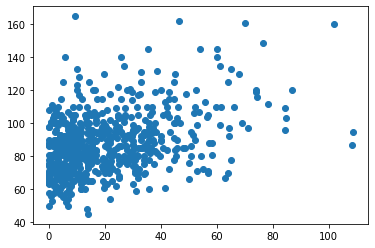

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(OSA_df['IAH'],OSA_df['Weight'])

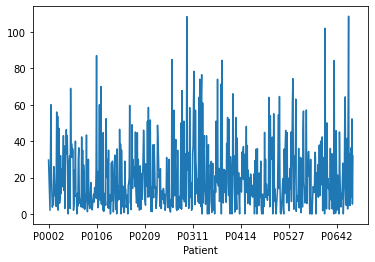

In [28]:
OSA_df['IAH'].plot()


In [29]:
OSA_df['IAH'].describe()

# .describe()   .mean()

count    635.000000
mean      20.354898
std       18.612508
min        0.000000
25%        6.350000
50%       14.300000
75%       30.000000
max      108.600000
Name: IAH, dtype: float64

In [30]:
# import the scatter_matrix functionality
from pandas.plotting import scatter_matrix

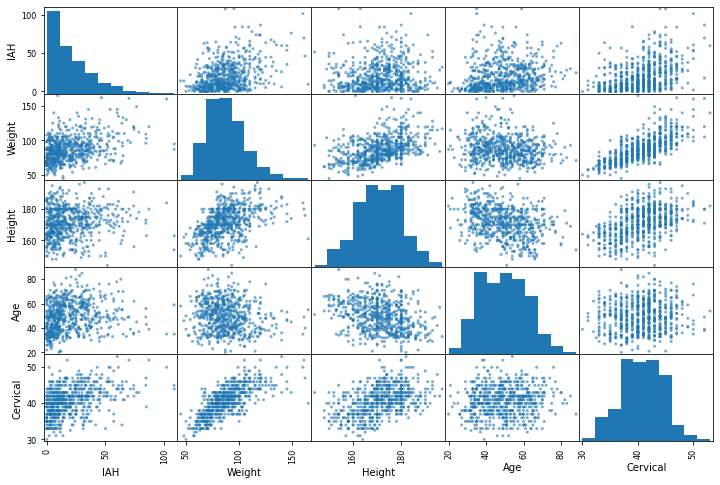

In [31]:
axes = scatter_matrix(OSA_df, alpha=0.6, figsize=(12, 8), diagonal='hist')

# diagonal = 'kde'

In [32]:
OSA_df.corr()

,IAH,Weight,Height,Age,Cervical
IAH,1.000000,0.391565,0.095377,0.157340,0.421827
Weight,0.391565,1.000000,0.461673,-0.138965,0.726175
Height,0.095377,0.461673,1.000000,-0.319193,0.455209
Age,0.157340,-0.138965,-0.319193,1.000000,0.083608
Cervical,0.421827,0.726175,0.455209,0.083608,1.000000


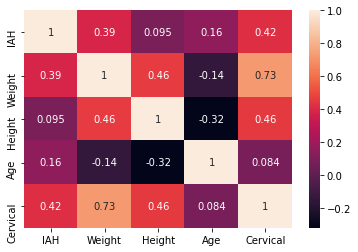

In [33]:
import seaborn as sn

sn.heatmap(OSA_df.corr(), annot=True)
plt.show()

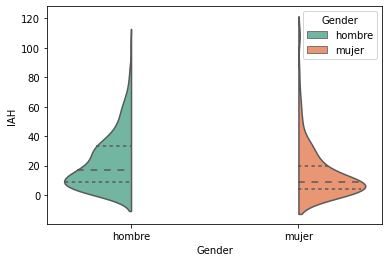

In [34]:
sn.violinplot(x=OSA_df["Gender"], y=OSA_df["IAH"], hue=OSA_df["Gender"],split=True, inner="quart", data=OSA_df,palette="Set2")
plt.show()

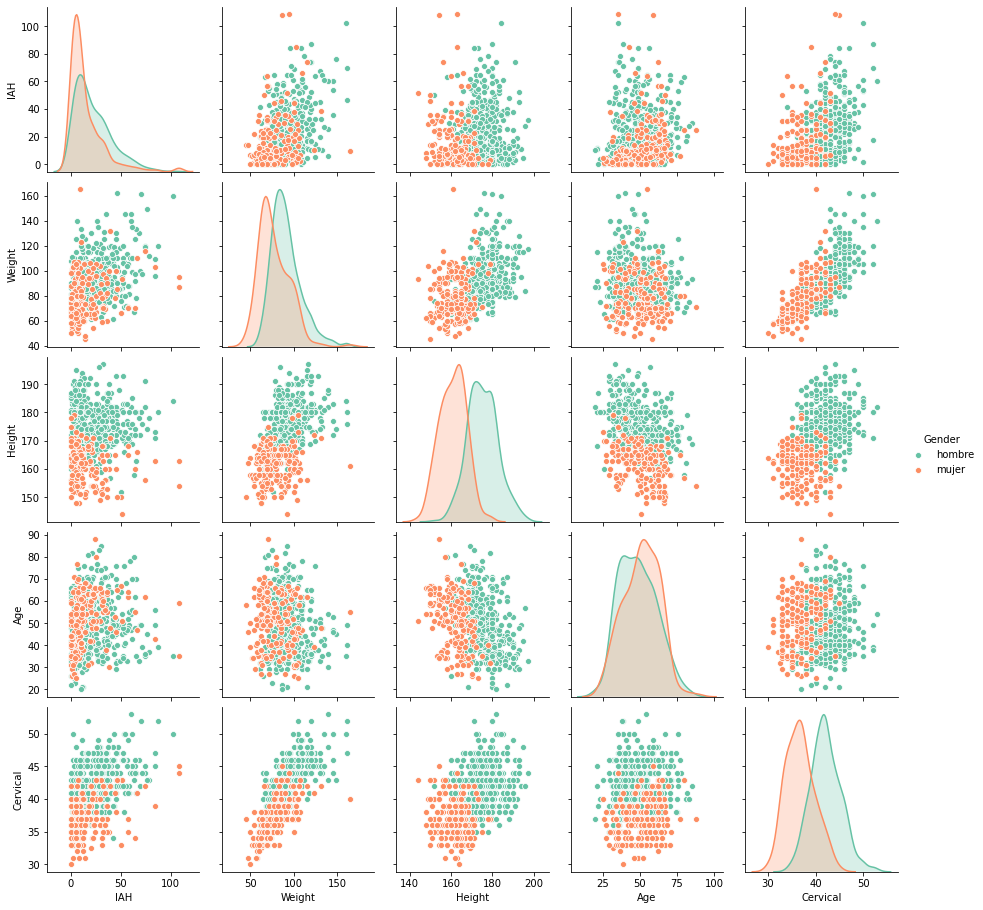

In [35]:
sn.pairplot(OSA_df, hue="Gender", palette="Set2")

## [scikit-learn: Machine Learning in Python](http://scikit-learn.org/stable/)
![Scikit-learn Image](http://scikit-learn.org/stable/_static/scikit-learn-logo-small.png)

## Python ML <font color='blue'>sklearn</font> for Multiple Linear Regression

In [36]:
del OSA_df["Diseases"]

In [79]:

### Picking predictor columns

# Get all the columns from the dataframe.
columns = OSA_df.columns.tolist()

# Filter the columns to remove ones we don't want.
columns = [c for c in columns if c not in ["IAH","Gender",'Weight','log_iah','Height', 'Age', 'Cervical']]

# Store the variable we'll be predicting on.
target = "IAH"

print('Predictors: ',columns)

Predictors:  ['log_weight', 'log_height', 'log_age', 'log_cervical']


In [80]:
# Splitting into train and test sets

# Generate the training set.  Set random_state to be able to replicate results.
train = OSA_df.sample(frac=0.8, random_state=1)

# Select anything not in the training set and put it in the testing set.
test = OSA_df.loc[~OSA_df.index.isin(train.index)]

# Print the shapes of both sets.
print(train.shape)
print(test.shape)

#train[columns]

(508, 11)
(127, 11)


## TRAIN:

In [81]:
# Fitting a linear regression

# Import the linear models.
from sklearn import linear_model

# Initialize the model class.

model= linear_model.LinearRegression()

# model= linear_model.Ridge(alpha = 0.5)
# Fit the model to the training data.
Trained_model=model.fit(train[columns], train[target])

## Test

In [82]:
### Predicting Error

# Import the scikit-learn function to compute error.
from sklearn.metrics import mean_squared_error

# Generate our predictions for the test set.
predictions = model.predict(test[columns])

# Compute error between our test predictions and the actual values.
MSE=mean_squared_error(predictions, test[target])
 
#print('Test set: ', test[target].tolist())
#print('Predictions: ', predictions)
print('Mean squared Error: ', MSE)

Mean squared Error:  366.2112448296259


In [83]:
# Explained variance score: 
from sklearn.metrics import r2_score

print('Variance score: %.2f' % r2_score(test[target], predictions))

Variance score: 0.20


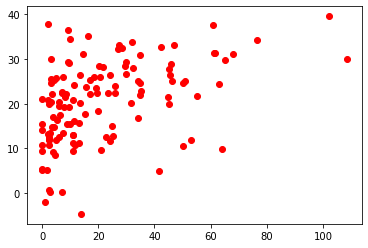

In [84]:
# Plot outputs
plt.scatter(test[target], predictions,  color='red')

plt.show()

## Try improve using "feature" engineering ...  BMI, ....  (log(AHI))

<ipython-input-43-f381af567a6d>:1: RuntimeWarning: invalid value encountered in log
  scatter = plt.scatter(np.log(test[target]+1), np.log(predictions),color='red')


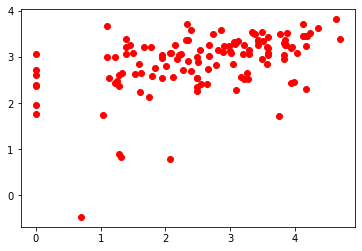

In [43]:
scatter = plt.scatter(np.log(test[target]+1), np.log(predictions),color='red')

plt.show()

In [85]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(train[columns], train[target])
predictions_tree = tree_reg.predict(train[columns])
#predictions_tree.tolist()

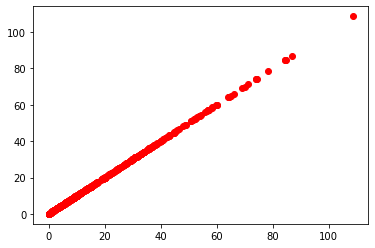

In [86]:
plt.scatter(train[target], predictions_tree,  color='red')

plt.show()

In [87]:
tree_mse = mean_squared_error(train[target], predictions_tree)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [88]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, train[columns], train[target],scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard deviation:", scores.std())

Scores: [-524.02411765 -489.99411765 -605.29294118 -375.00254902 -657.18974118
 -374.76372549 -558.22156863 -694.83196078 -866.625152   -469.5504    ]
Mean: -561.5496273568627
Standard deviation: 143.73163856499596


In [89]:
lin_scores = cross_val_score(model, train[columns], train[target],scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
print("Scores:", lin_rmse_scores)
print("Mean:", lin_rmse_scores.mean())
print("Standard deviation:", lin_rmse_scores.std())

Scores: [15.17476085 10.91870373 18.38482745 13.99348847 14.39270451 16.46023234
 16.65160672 17.78431982 16.8587054  16.87918793]
Mean: 15.749853722049417
Standard deviation: 2.0857204465899466


In [90]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(train[columns], train[target])
predictions_forest = forest_reg.predict(train[columns])
forest_rmse = mean_squared_error(train[target],predictions_forest)
forest_rmse

42.733240769763746

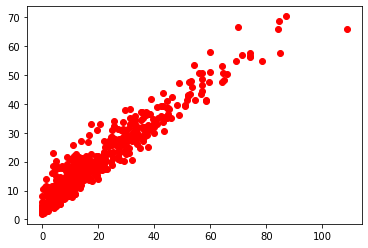

In [91]:
plt.scatter(train[target], predictions_forest,  color='red')

plt.show()

In [ ]:
forest_scores = cross_val_score(forest_reg, train[columns], train[target],scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
print("Scores:", forest_rmse_scores)
print("Mean:", forest_rmse_scores.mean())
print("Standard deviation:", forest_rmse_scores.std())

### Log transformation

In [53]:
OSA_df['log_weight'] = np.log(OSA_df['Weight']+1)
OSA_df['log_height'] = np.log(OSA_df['Height']+1)
OSA_df['log_age'] = np.log(OSA_df['Age']+1)
OSA_df['log_cervical'] = np.log(OSA_df['Cervical']+1)
OSA_df['log_iah'] = np.log(OSA_df['IAH']+1)

In [ ]:
OSA_df